# Prepare the Data

In [81]:
# Set up files using starter code
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

In [2]:
# Study data files with starter code
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and study data with starter code
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataframe
combo_df = pd.merge(study_results, mouse_metadata, how= 'inner', on='Mouse ID')

In [5]:
# Display the dataframe
combo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# check for the number of unique mice
unique_mice = combo_df["Mouse ID"].nunique()
unique_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Optional: Get all the data for the duplicate mouse ID
duplicated_df = combo_df[combo_df.duplicated(subset=["Mouse ID","Timepoint"],keep= False)]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_duplicates = duplicated_df["Mouse ID"].unique()
unique_duplicates

array(['g989'], dtype=object)

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combo_df.loc[combo_df["Mouse ID"] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
unique_cleaned = cleaned_df.nunique()
unique_cleaned

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

# Generate Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_drug_group = cleaned_df.groupby(["Drug Regimen"])
mean = summary_drug_group['Tumor Volume (mm3)'].mean()
med = summary_drug_group['Tumor Volume (mm3)'].median()
var = summary_drug_group['Tumor Volume (mm3)'].var()
std = summary_drug_group['Tumor Volume (mm3)'].std()
sem = summary_drug_group['Tumor Volume (mm3)'].sem()

volume_summary = pd.DataFrame({
                        "Mean Tumor Volume": mean,
                        "Median Tumor Volume" : med,
                        "Variance Tumor Volume" : var,
                        "Standard Deviation Tumor Volume" : std,
                        "SEM Tumor Volume" : sem
                        })

volume_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_volume = summary_drug_group["Tumor Volume (mm3)"].agg(["mean","median","std","sem","var"])
summary_volume

,mean,median,std,sem,var
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


# Create Pie Charts and Bar Charts

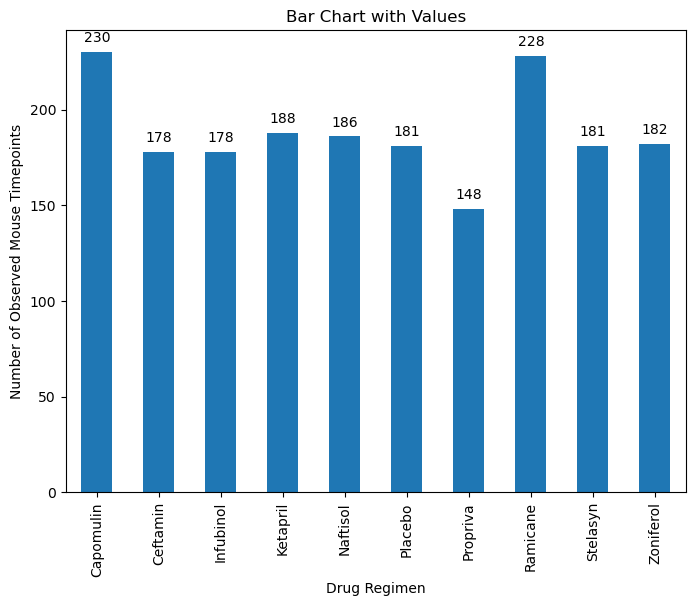

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

row_count = summary_drug_group["Mouse ID"].count()
ax = row_count.plot(kind='bar',figsize=(8,6),
                                   xlabel="Number of Observed Mouse Timepoints",
                                   ylabel="Drug Regimen")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Observed Mouse Timepoints")
ax.set_title("Bar Chart with Values")

plt.show()

<BarContainer object of 10 artists>

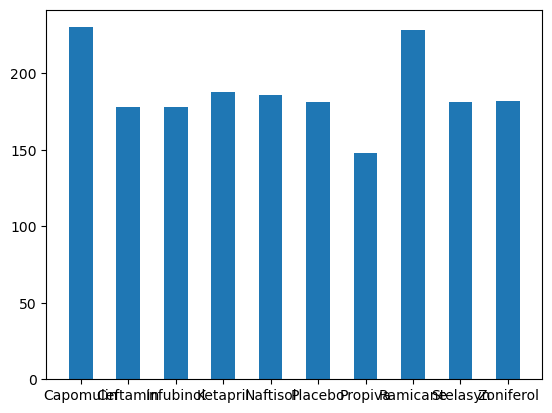

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = ["Capomulin","Ceftamin","Infubinol","Ketapril", "Naftisol", "Placebo", "Propiva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoint_number = [230,178,178,188,186,181,148,228,181,182]
plt.bar(drug_regimen, height = timepoint_number, width = 0.5)

<Axes: ylabel='Mouse ID'>

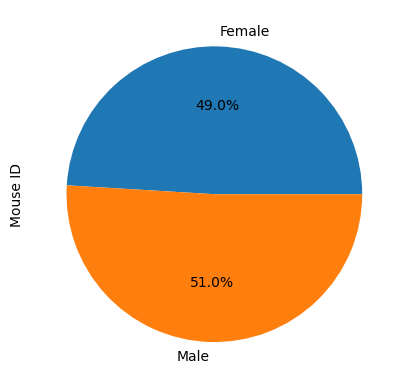

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = cleaned_df.groupby(["Sex"])
pie_count = pie_df["Mouse ID"].count()
pie_count.plot(kind= 'pie',autopct='%1.1f%%', legend=False)

([<matplotlib.patches.Wedge at 0x1fa62876b30>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%)'),
  Text(0.01884643747940977, -0.5997039367840891, '49.0%)')])

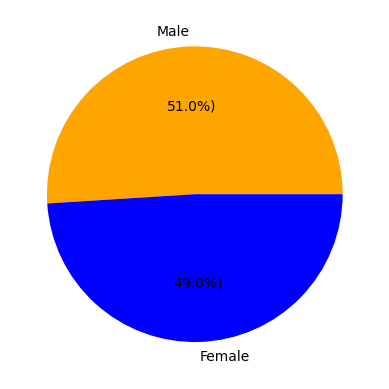

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male","Female"]
percent = [51,49]
colors = ["orange","blue"]
plt.pie(percent, labels=sex, colors=colors,
        autopct="%1.1f%%)")

# Calculate quartiles, find outliers, and create a box plot

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
print(greatest_tp)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_merged = pd.merge(cleaned_df, greatest_tp, on=["Mouse ID","Timepoint"], how= "inner")
print(greatest_merged)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       b128         45           38.982878                 2    Capomulin   
1       f932          0           45.000000                 0     Ketapril   
2       g107         35           71.905117                 0     Ketapril   
3       a457         10           49.783419                 0     Ketapril   
4       c819         40           62.175705                 1     Ketapril   
..       ...        ...                 ...               ...          ...   
243     t565         45           34.455298                 0    Capomulin   
244     i557         45           47.685963                 1    Capomulin   
245     m957         45           33.329098                 1    Capomulin   
246     f966         20           30.485985                 0    Capomulin   
247     m601         45           28.430964                 1    Capomulin   

        Sex  Age_months  Weight (g)  
0    Female           9  

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = greatest_merged["Drug Regimen"].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)
volume_list = []

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outlier
 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    t_vol = greatest_merged.loc[greatest_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    volume_list.append(t_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = t_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = t_vol[(t_vol < lower_bound) | (t_vol > upper_bound)]
    
    print(f"Potential outliers for {drug}: {outliers.tolist()}")

Potential outliers for Capomulin: []
Potential outliers for Ketapril: []
Potential outliers for Naftisol: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Stelasyn: []
Potential outliers for Ramicane: []
Potential outliers for Zoniferol: []
Potential outliers for Propriva: []
Potential outliers for Placebo: []
Potential outliers for Ceftamin: []


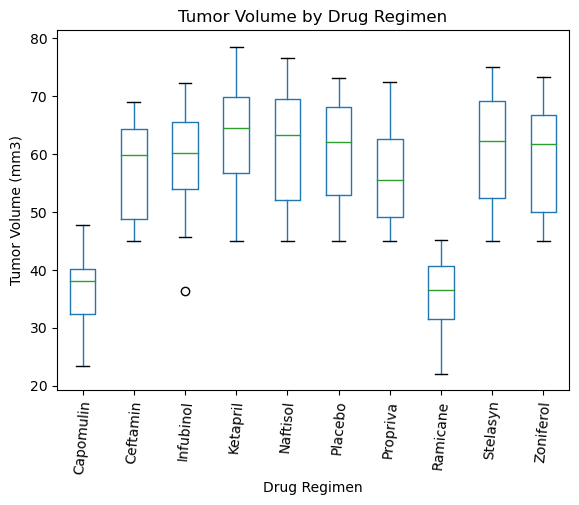

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
ax = greatest_merged.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
plt.title('Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
plt.show()

# Create a line plot and a scatter plot

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

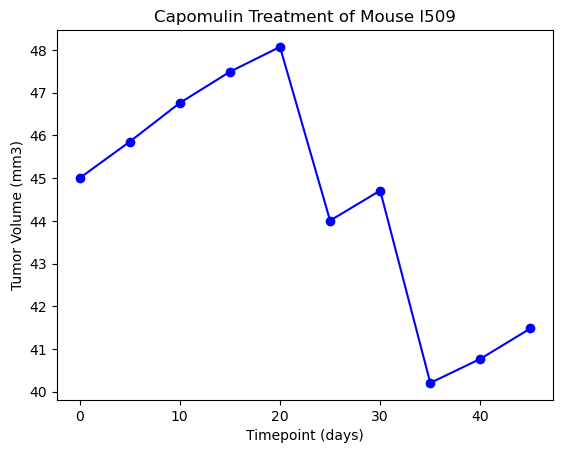

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509")]

plt.plot(cap_data["Timepoint"], cap_data["Tumor Volume (mm3)"], marker="o", linestyle="-", color="b")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")


In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_reg = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
cap_av = cap_reg.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_merge = pd.merge(cap_reg, cap_av, on="Mouse ID")
cap_merge

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,41.963636
1,b128,5,45.651331,0,Capomulin,Female,9,22,41.963636
2,b128,10,43.270852,0,Capomulin,Female,9,22,41.963636
3,b128,15,43.784893,0,Capomulin,Female,9,22,41.963636
4,b128,20,42.731552,0,Capomulin,Female,9,22,41.963636
...,...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17,34.847470
226,m601,30,31.758275,1,Capomulin,Male,22,17,34.847470
227,m601,35,30.834357,1,Capomulin,Male,22,17,34.847470
228,m601,40,31.378045,1,Capomulin,Male,22,17,34.847470


Text(0, 0.5, 'Average Tumor Volume (mm3)')

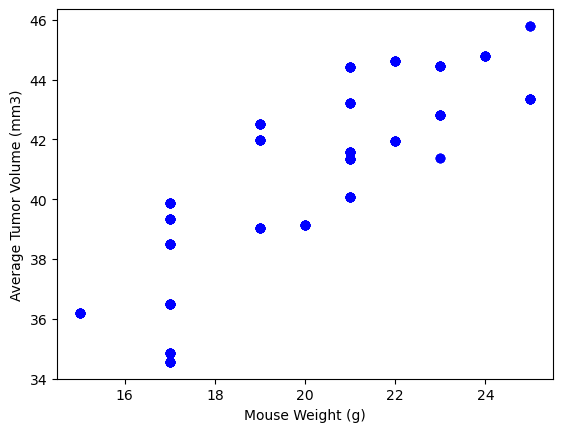

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(cap_merge["Weight (g)"], cap_merge["Tumor Volume (mm3)_y"], color="b", marker="o")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Calculate correlation and regression

In [85]:
# Calculate the correlation coefficient and a linear regression model 
correlation_cap = pearsonr(cap_merge["Weight (g)"], cap_merge["Tumor Volume (mm3)_y"])
print(f"Correlation Coefficient: {correlation_cap}")

Correlation Coefficient: PearsonRResult(statistic=0.8343958614425957, pvalue=6.495737656135902e-61)


Text(0, 0.5, 'Average Tumor Volume (mm3)')

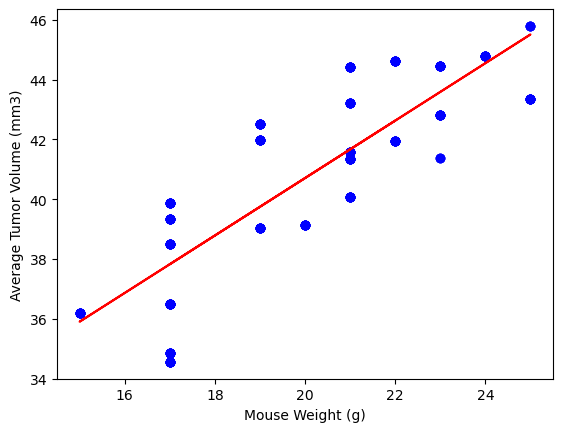

In [88]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = linregress(cap_merge['Weight (g)'], cap_merge['Tumor Volume (mm3)_y'])
predict = slope * cap_merge["Weight (g)"] + intercept
plt.scatter(cap_merge["Weight (g)"], cap_merge["Tumor Volume (mm3)_y"], color='b', marker='o')
plt.plot(cap_merge["Weight (g)"], predict, color='r', label='Linear Regression Line')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")